# Import Libraries and Load Dataset

In [190]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score, f1_score
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [78]:
data = pd.read_csv("customer_churn_dataset-training-master.csv")
# test_data = pd.read_csv("customer_churn_dataset-testing-master.csv")

# Exploratory Data Analysis (EDA)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [80]:
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [167]:
data.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [169]:
data.dropna(inplace=True)

In [170]:
data.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [168]:
data.duplicated().sum()

0

In [81]:
data["Churn"].value_counts()

1.0    249999
0.0    190833
Name: Churn, dtype: int64

In [82]:
data["Subscription Type"].value_counts()

Standard    149128
Premium     148678
Basic       143026
Name: Subscription Type, dtype: int64

In [84]:
data["Contract Length"].value_counts()

Annual       177198
Quarterly    176530
Monthly       87104
Name: Contract Length, dtype: int64

In [195]:
# convert "Churn" columndata type into into categorical: "Churn" vs "Not Churn"
eda_data = data.copy()
eda_data["Churn"] = eda_data["Churn"].astype("category")
eda_data["Churn"] = eda_data["Churn"].cat.rename_categories(["Not Churn", "Churn"])

In [197]:
eda_data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,Churn
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,Churn
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,Churn
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,Churn
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,Churn
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,Not Churn
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,Not Churn
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,Not Churn
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,Not Churn


In [244]:
# count customer id unique

eda_data["CustomerID"].nunique()

440832

Text(0,0.5,'Number of Customers')

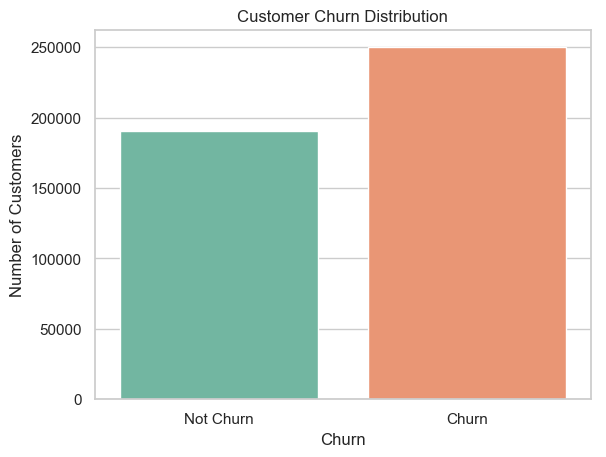

In [229]:
# Churn customer distribution pie chart

sns.countplot(x='Churn', data=eda_data, palette='Set2')
plt.title('Customer Churn Distribution')
plt.ylabel('Number of Customers')

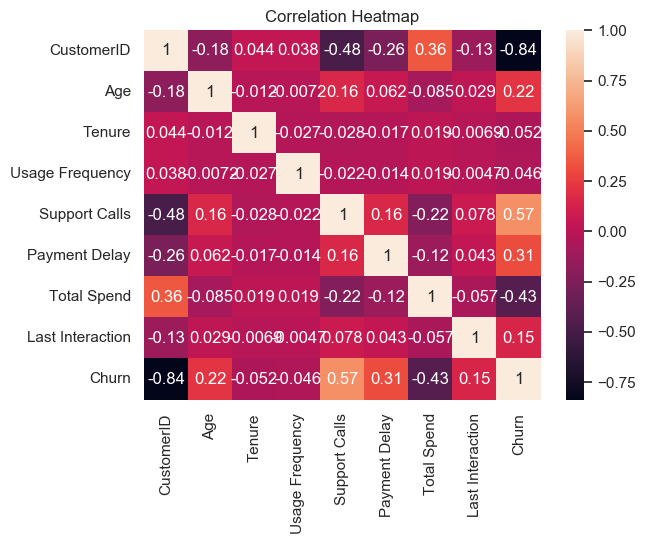

In [213]:
# Correlation heatmap chart

sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

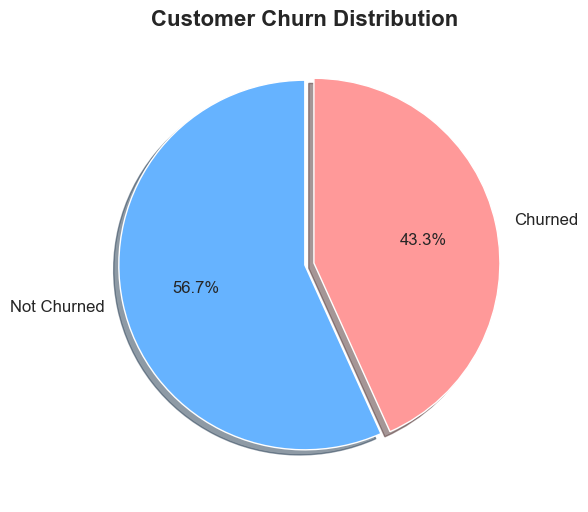

In [241]:
# Calculate churn counts
churn_counts = eda_data['Churn'].value_counts()
labels = ['Not Churned', 'Churned']
colors = ['#66b3ff', '#ff9999']

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(
    churn_counts,
    labels=labels,
    autopct='%1.1f%%',       # show percentages
    startangle=90,           # start from top
    colors=colors,
    explode=(0, 0.05),       # slightly explode churned slice
    shadow=True,
    textprops={'fontsize': 12}
)

plt.title('Customer Churn Distribution', fontsize=16, fontweight='bold')
plt.show()

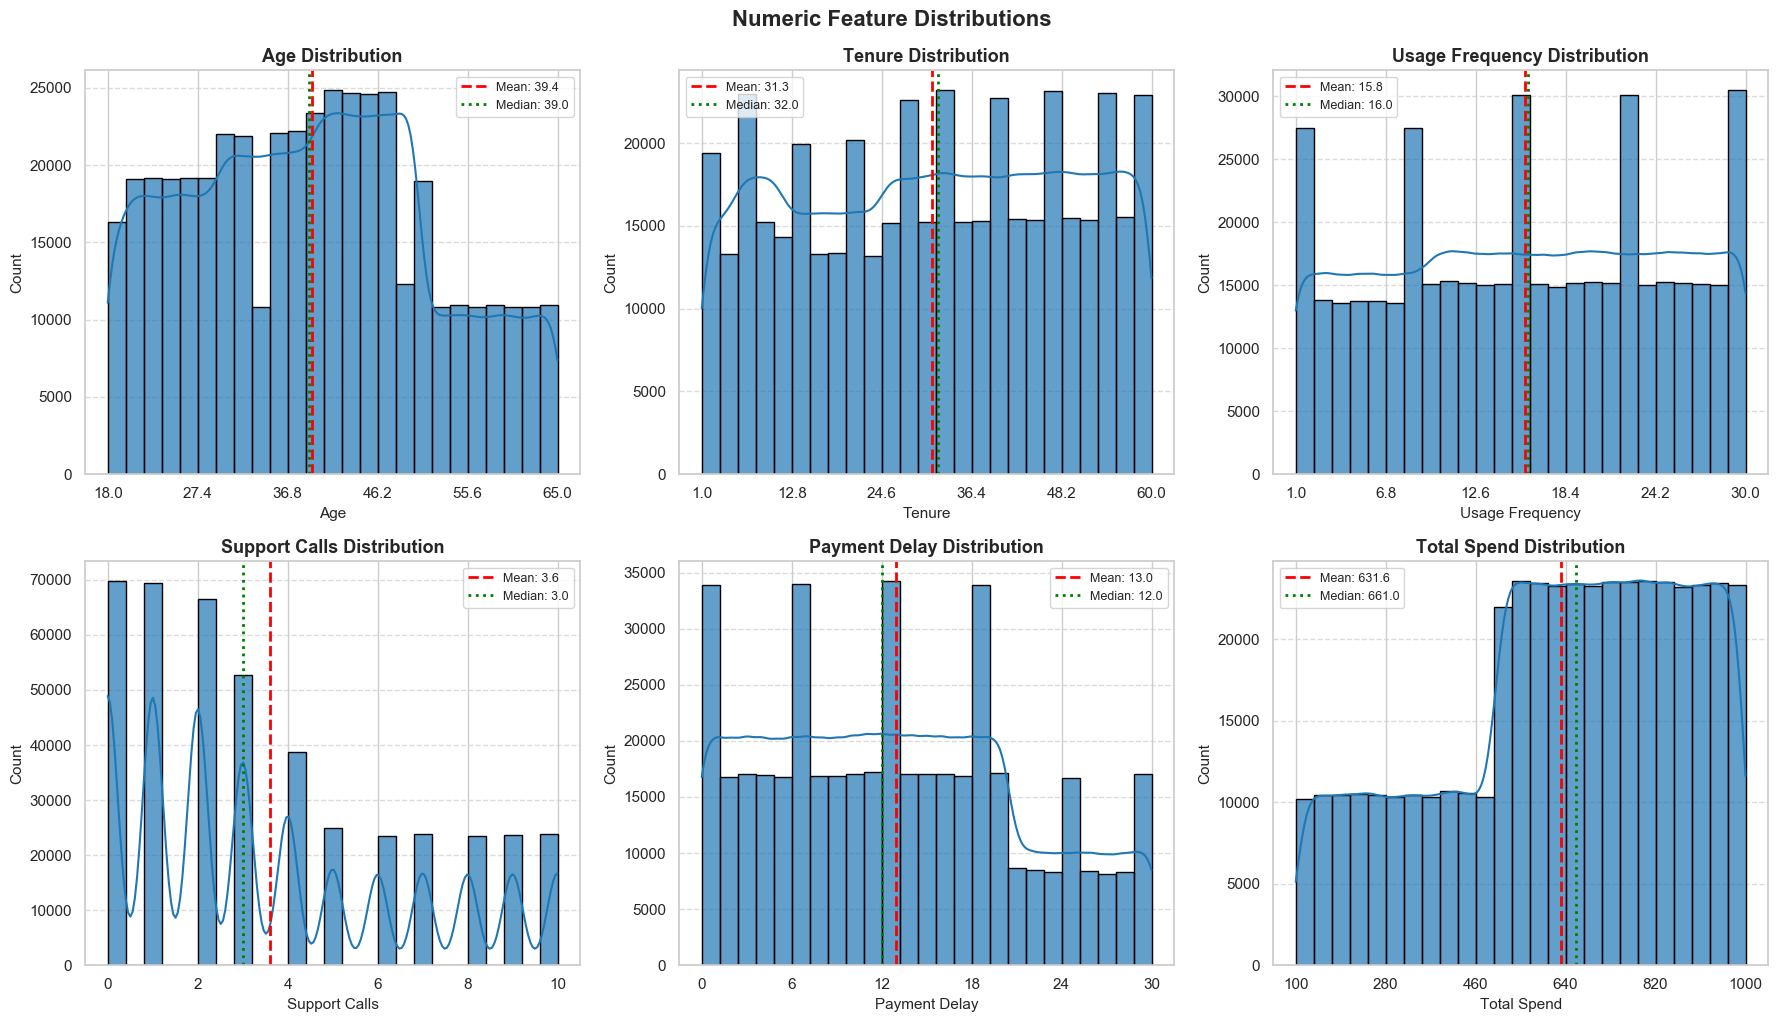

In [228]:
# Define numeric columns
numeric_columns = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend']

# Set up the figure grid: 2 rows × 3 columns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Set Seaborn style
sns.set(style="whitegrid")

# Loop through each numeric column and plot on the corresponding axis
for i, column in enumerate(numeric_columns):
    ax = axes[i]
    sns.histplot(
        eda_data[column],
        bins=25,
        kde=True,
        color='#1f77b4',
        edgecolor='black',
        alpha=0.7,
        ax=ax
    )

    # Calculate stats
    mean_val = eda_data[column].mean()
    median_val = eda_data[column].median()

    # Add mean and median lines
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
    ax.axvline(median_val, color='green', linestyle=':', linewidth=2, label=f'Median: {median_val:.1f}')

    # Titles and labels
    ax.set_title(f'{column} Distribution', fontsize=13, fontweight='bold')
    ax.set_xlabel(column, fontsize=11)
    ax.set_ylabel('Count', fontsize=11)

    # Grid, legend, ticks
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend(fontsize=9, frameon=True)
    ax.set_xticks(np.linspace(eda_data[column].min(), eda_data[column].max(), num=6))

# Remove any unused subplots
for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])

# Add a global title
fig.suptitle('Numeric Feature Distributions', fontsize=16, fontweight='bold', y=1.02)

# Adjust layout
plt.tight_layout()
plt.show()

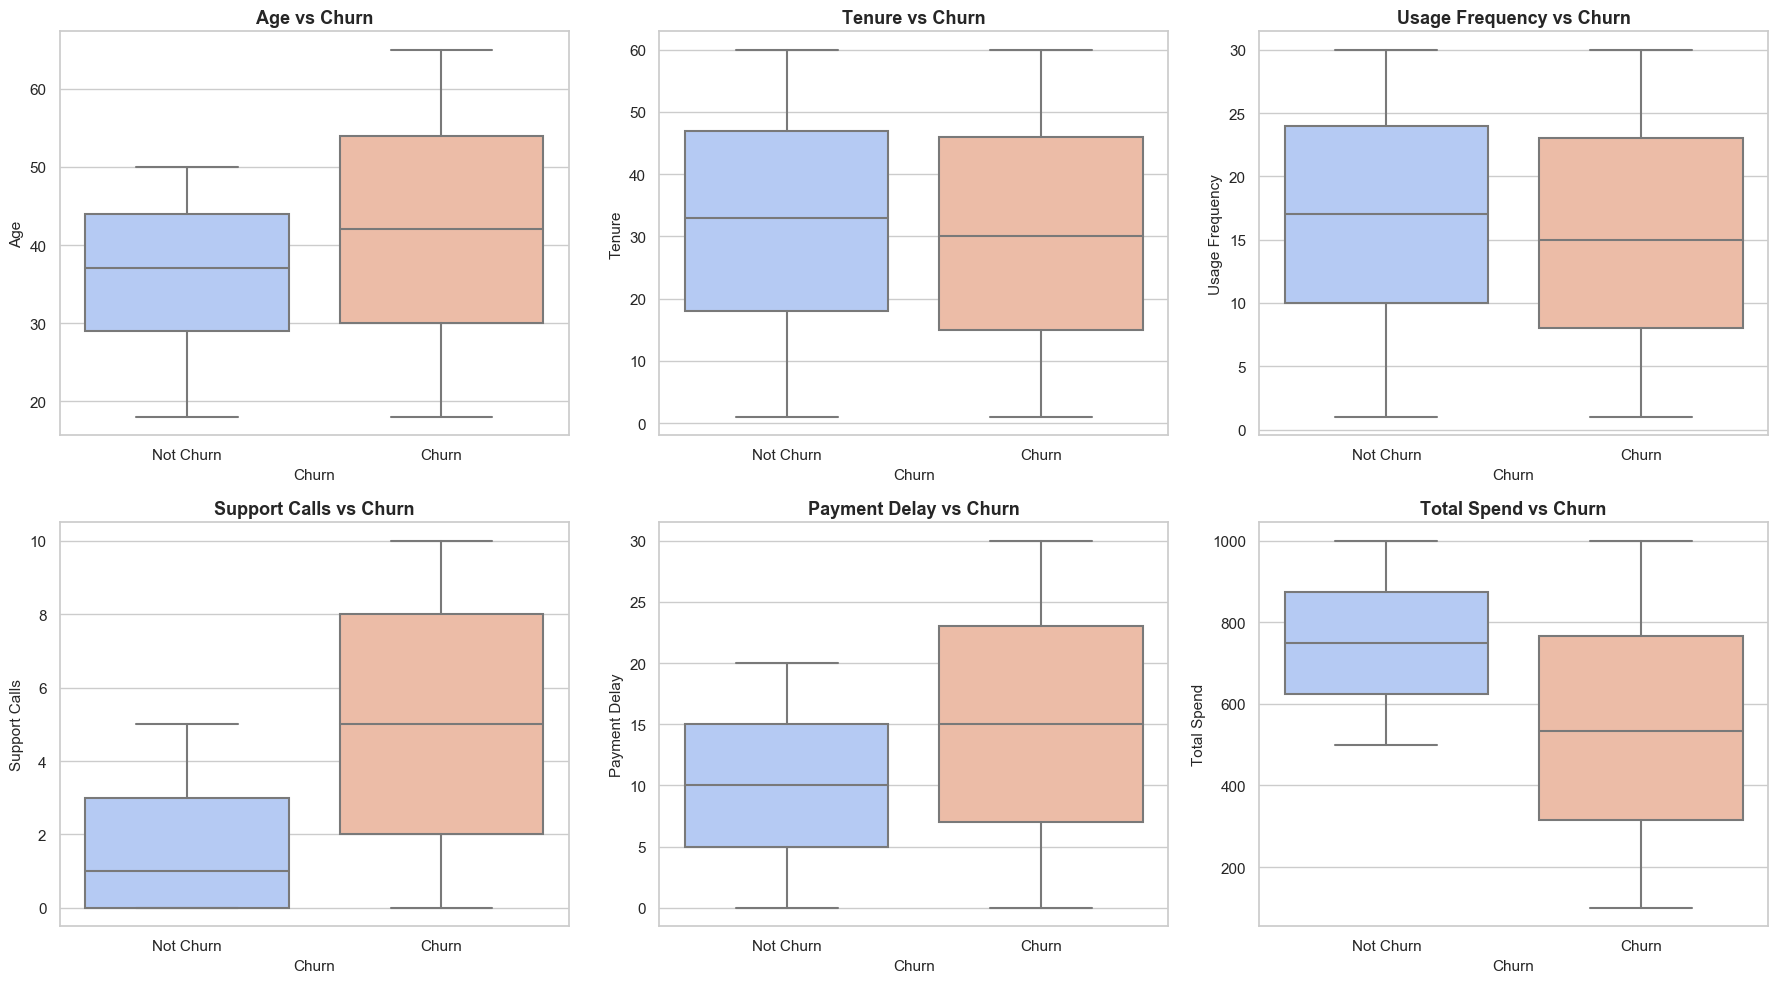

In [226]:
# Define your numeric columns
numeric_columns = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend']

# Set up the figure grid — 2 rows × 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Seaborn style
sns.set(style="whitegrid")

# Create one boxplot per subplot
for i, column in enumerate(numeric_columns):
    sns.boxplot(
        x='Churn', 
        y=column, 
        data=eda_data, 
        palette='coolwarm', 
        ax=axes[i]
    )
    axes[i].set_title(f'{column} vs Churn', fontsize=13, fontweight='bold')
    axes[i].set_xlabel('Churn', fontsize=11)
    axes[i].set_ylabel(column, fontsize=11)

# Remove any empty subplots (in case of fewer columns)
for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

Text(0,0.5,'Churn Rate')

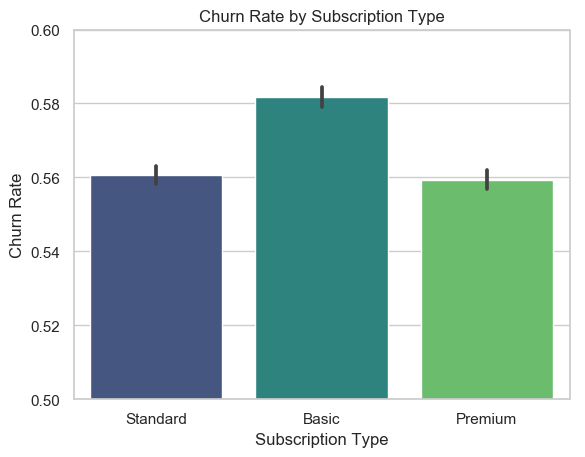

In [231]:
sns.barplot(x='Subscription Type', y='Churn', data=data, estimator=np.mean, palette='viridis')
plt.title('Churn Rate by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylim(0.5, 0.6)
plt.ylabel('Churn Rate')

([<matplotlib.axis.YTick at 0x19f06104880>,
 <a list of 10 Text yticklabel objects>)

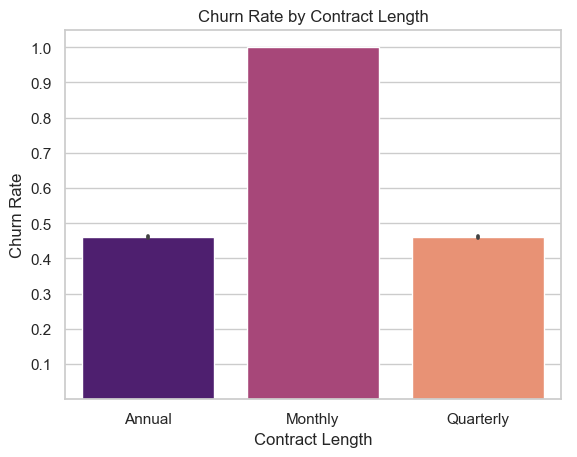

In [233]:
sns.barplot(x='Contract Length', y='Churn', data=data, estimator=np.mean, palette='magma')
plt.title('Churn Rate by Contract Length')
plt.xlabel('Contract Length')
plt.ylabel('Churn Rate')
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

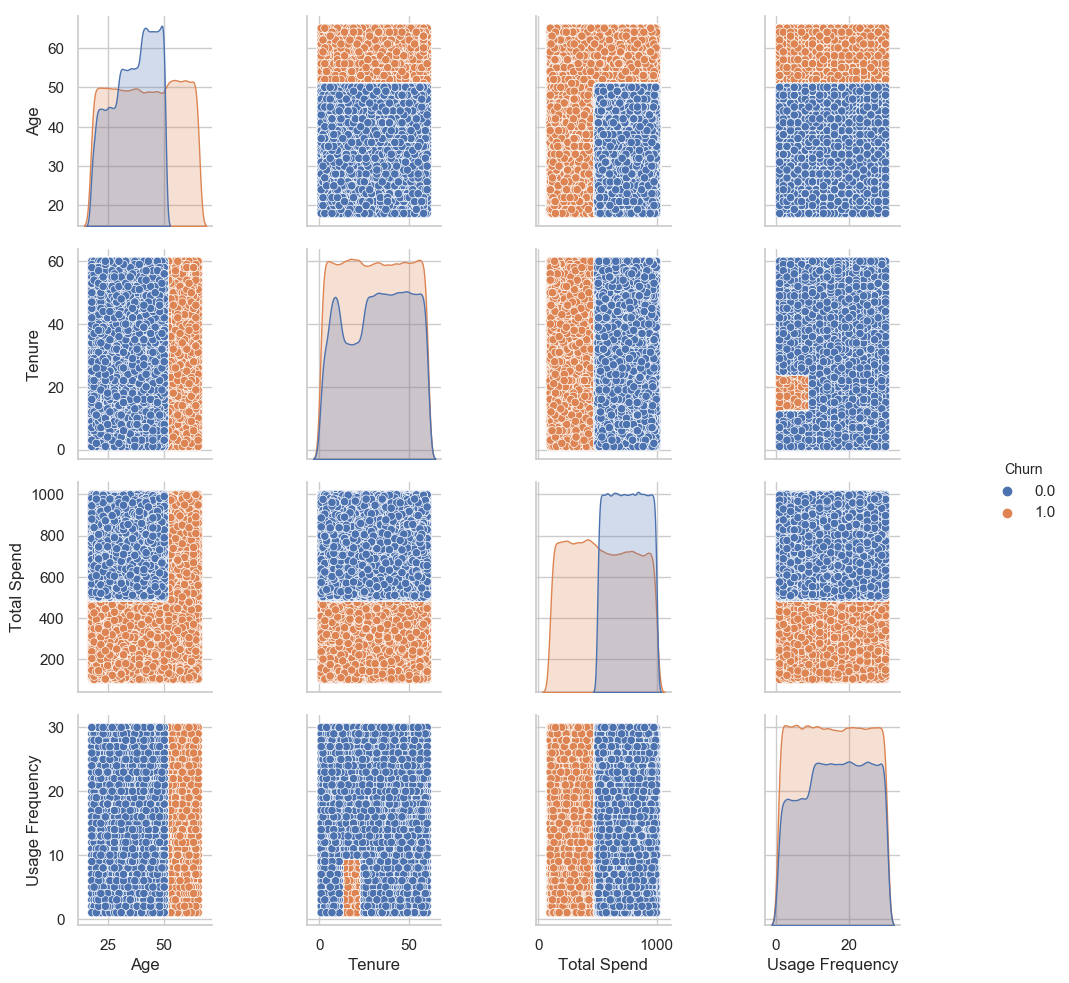

In [ ]:
sns.pairplot(data, hue='Churn', diag_kind='kde', vars=['Age', 'Tenure', 'Total Spend', 'Usage Frequency'])


# Data Splitting and Preprocessing

In [85]:
# Separate features and target
X = data.drop(columns=['CustomerID', 'Gender','Churn'])
y = data['Churn']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(352666, 9) (352666,)
(88167, 9) (88167,)


In [88]:
print("Training Label Distribution:")
print(y_train.value_counts())
print("-"*100)
print("Test Label Distribution:")
print(y_test.value_counts())

Training Label Distribution:
1.0    199975
0.0    152690
Name: Churn, dtype: int64
----------------------------------------------------------------------------------------------------
Test Label Distribution:
1.0    50024
0.0    38143
Name: Churn, dtype: int64


In [90]:
# Encode categorical columns
cat_cols = ['Subscription Type', 'Contract Length']
le = LabelEncoder()
for col in cat_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# (Optional) Scale numerical columns for models like Logistic Regression
num_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [98]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352665 entries, 39267 to 121958
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                352665 non-null  float64
 1   Tenure             352665 non-null  float64
 2   Usage Frequency    352665 non-null  float64
 3   Support Calls      352665 non-null  float64
 4   Payment Delay      352665 non-null  float64
 5   Subscription Type  352665 non-null  int64  
 6   Contract Length    352665 non-null  int64  
 7   Total Spend        352665 non-null  float64
 8   Last Interaction   352665 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 26.9 MB


In [100]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 352665 entries, 39267 to 121958
Series name: Churn
Non-Null Count   Dtype  
--------------   -----  
352665 non-null  float64
dtypes: float64(1)
memory usage: 5.4 MB


In [26]:
# Save the scaler and encoder for future use
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']

In [102]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

c:\Users\LENOVO\.conda\envs\portfolio-n-work\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


# Build and Train Models

## Logistic Regression

In [121]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8449760114328491
              precision    recall  f1-score   support

         0.0       0.81      0.84      0.82     38143
         1.0       0.88      0.85      0.86     50024

    accuracy                           0.84     88167
   macro avg       0.84      0.84      0.84     88167
weighted avg       0.85      0.84      0.85     88167

[[32188  5955]
 [ 7713 42311]]


In [122]:
joblib.dump(log_reg, "churn_predictiom_lr.pkl")

['churn_predictiom_lr.pkl']

In [123]:
log_reg_smote = LogisticRegression(max_iter=1000)
log_reg_smote.fit(X_res, y_res)
y_pred_lr_smote = log_reg_smote.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr_smote))
print(classification_report(y_test, y_pred_lr_smote))
print(confusion_matrix(y_test, y_pred_lr_smote))

Logistic Regression Accuracy: 0.847233091746345
              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83     38143
         1.0       0.90      0.82      0.86     50024

    accuracy                           0.85     88167
   macro avg       0.85      0.85      0.85     88167
weighted avg       0.85      0.85      0.85     88167

[[33594  4549]
 [ 8920 41104]]


In [124]:
joblib.dump(log_reg_smote, "churn_predictiom_lr_smote.pkl")

['churn_predictiom_lr_smote.pkl']

## Random Forest

In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.9841323851327595
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     38143
         1.0       1.00      0.97      0.99     50024

    accuracy                           0.98     88167
   macro avg       0.98      0.99      0.98     88167
weighted avg       0.98      0.98      0.98     88167

[[38142     1]
 [ 1398 48626]]


In [118]:
# Save model
joblib.dump(rf, "churn_predictiom_rf.pkl")

['churn_predictiom_rf.pkl']

In [119]:
rf_smote = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_smote.fit(X_res, y_res)
y_pred_rf_smote = rf_smote.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf_smote))
print(confusion_matrix(y_test, y_pred_rf_smote))


Random Forest Accuracy: 0.9841323851327595
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     38143
         1.0       1.00      0.97      0.99     50024

    accuracy                           0.98     88167
   macro avg       0.98      0.99      0.98     88167
weighted avg       0.98      0.98      0.98     88167

[[38142     1]
 [ 1393 48631]]


In [120]:
# Save model
joblib.dump(rf_smote, "churn_predictiom_rf_smote.pkl")

['churn_predictiom_rf_smote.pkl']

## XGBoost

In [112]:
scale = len(y_train[y_train==0]) / len(y_train[y_train==1])

In [113]:
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method='gpu_hist',  # Use GPU if available
    scale_pos_weight=scale
)
xgb_model.fit(X_res, y_res)
y_pred_xgb = xgb_model.predict(X_test)

print("\nXGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

c:\Users\LENOVO\.conda\envs\portfolio-n-work\lib\site-packages\xgboost\core.py:158: UserWarning: [08:47:34] WARNING: D:\bld\xgboost-split_1744329000128\work\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.9909603366338879
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     38143
         1.0       1.00      0.98      0.99     50024

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167

[[38143     0]
 [  797 49227]]


c:\Users\LENOVO\.conda\envs\portfolio-n-work\lib\site-packages\xgboost\core.py:158: UserWarning: [08:47:37] WARNING: D:\bld\xgboost-split_1744329000128\work\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


In [115]:
# Save model
xgb_model.save_model("churn_predictiom_xgb.json")  # Recommended method for XGBoost

In [116]:
xgb_model_smote = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method='gpu_hist',  # Use GPU if available
)
xgb_model_smote.fit(X_res, y_res)
y_pred_xgb = xgb_model_smote.predict(X_test)

print("\nXGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

c:\Users\LENOVO\.conda\envs\portfolio-n-work\lib\site-packages\xgboost\core.py:158: UserWarning: [08:51:11] WARNING: D:\bld\xgboost-split_1744329000128\work\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.9909716787460161
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     38143
         1.0       1.00      0.98      0.99     50024

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167

[[38143     0]
 [  796 49228]]


c:\Users\LENOVO\.conda\envs\portfolio-n-work\lib\site-packages\xgboost\core.py:158: UserWarning: [08:51:14] WARNING: D:\bld\xgboost-split_1744329000128\work\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


In [117]:
# Save model
xgb_model_smote.save_model("churn_predictiom_xgb_smote.json")  # Recommended method for XGBoost

## LightGBM

In [125]:
# LightGBM

lgbm_model = lgb.LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)
print("\n🌳 LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm))
print(confusion_matrix(y_test, y_pred_lgbm))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 199975, number of negative: 152690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 477
[LightGBM] [Info] Number of data points in the train set: 352665, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.567040 -> initscore=0.269783
[LightGBM] [Info] Start training from score 0.269783

🌳 LightGBM Accuracy: 0.9907334943913255
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     38143
         1.0       1.00      0.98      0.99     50024

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88

In [126]:
# Save model
joblib.dump(lgbm_model, "churn_predictiom_lgbm.pkl")

['churn_predictiom_lgbm.pkl']

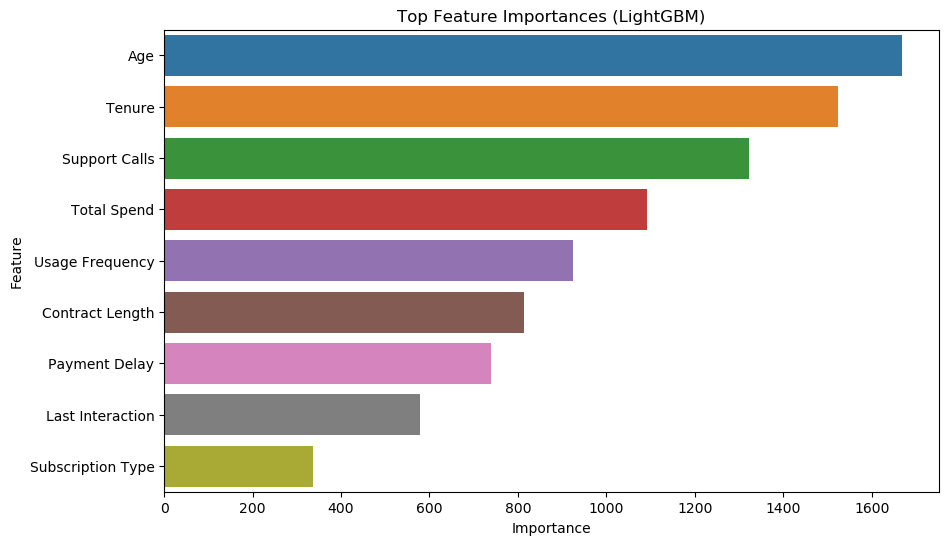

In [130]:
lgbm_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': lgbm_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=lgbm_importance.head(15))
plt.title("Top Feature Importances (LightGBM)")
plt.show()

In [127]:
# LightGBM

lgbm_model_smote = lgb.LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
lgbm_model_smote.fit(X_res, y_res)
y_pred_lgbm_smote = lgbm_model_smote.predict(X_test)
print("\n🌳 LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm_smote))
print(classification_report(y_test, y_pred_lgbm_smote))
print(confusion_matrix(y_test, y_pred_lgbm_smote))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 199975, number of negative: 199975
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005743 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1791
[LightGBM] [Info] Number of data points in the train set: 399950, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

🌳 LightGBM Accuracy: 0.9911304683158098
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     38143
         1.0       1.00      0.98      0.99     50024

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167

[[38142     1]
 [  781 49243]]


In [128]:
# Save model
joblib.dump(lgbm_model_smote, "churn_predictiom_lgbm_smote.pkl")

['churn_predictiom_lgbm_smote.pkl']

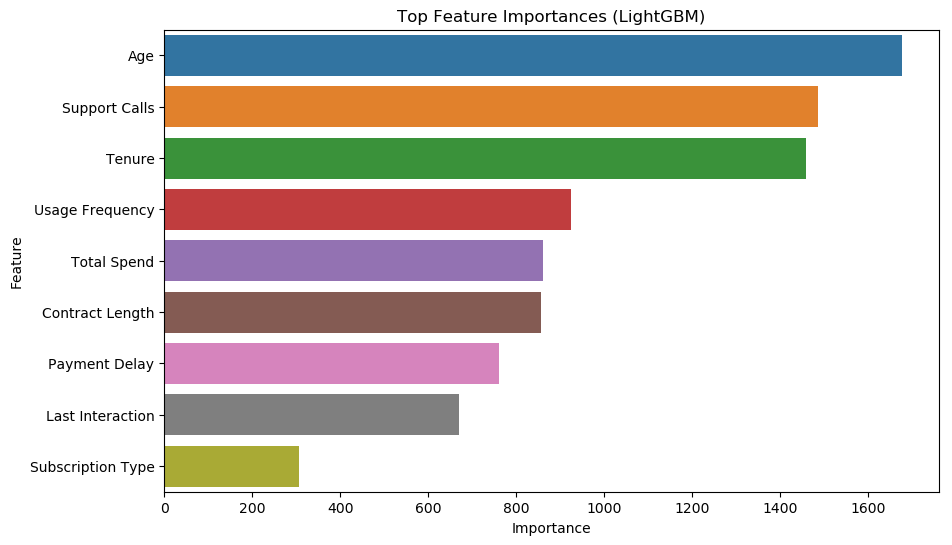

In [131]:
lgbm_smote_importance = pd.DataFrame({
    'Feature': X_res.columns,
    'Importance': lgbm_model_smote.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=lgbm_smote_importance.head(15))
plt.title("Top Feature Importances (LightGBM)")
plt.show()

In [69]:
print("Training Label Distribution:")
print(y_train.value_counts())

Training Label Distribution:
1.0    249999
0.0    190833
Name: Churn, dtype: int64


# Hyperparameter Tuning

In [68]:
from scipy.stats import randint, uniform

## Logistic Regression

In [152]:
# Base model
log_reg_tuned = LogisticRegression(solver='saga', max_iter=500)

# Hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0, 0.5, 1],
    'solver': ['saga'],   # saga supports l1, l2, elasticnet
    'max_iter': [500]
}

# Grid search setup
lr_search = GridSearchCV(
    estimator=log_reg_tuned,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit
lr_search.fit(X_train, y_train)

# Best model
lr_best = lr_search.best_estimator_

print("Best Parameters:", lr_search.best_params_)

# Evaluate
y_pred_lr_tuned = lr_best.predict(X_test)
y_proba_lr_tuned = lr_best.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr_tuned))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr_tuned))
print("\nROC AUC:", roc_auc_score(y_test, y_proba_lr_tuned))

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Parameters: {'C': 0.001, 'l1_ratio': 0, 'max_iter': 500, 'penalty': 'elasticnet', 'solver': 'saga'}

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83     38143
         1.0       0.88      0.85      0.86     50024

    accuracy                           0.85     88167
   macro avg       0.84      0.85      0.84     88167
weighted avg       0.85      0.85      0.85     88167


Confusion Matrix:
 [[32233  5910]
 [ 7726 42298]]

ROC AUC: 0.9228461982848815


In [155]:
joblib.dump(lr_best, "churn_predictiom_lr_tuned.pkl")

['churn_predictiom_lr_tuned.pkl']

## Random Forest

In [146]:
print("\nTuning Random Forest...")
rf_tuned = RandomForestClassifier(random_state=42, n_jobs=-1)

rf_param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

rf_search = RandomizedSearchCV(
    rf_tuned,
    param_distributions=rf_param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1
)
rf_search.fit(X_train, y_train)
rf_best = rf_search.best_estimator_

print("\n✅ Best Random Forest Params:", rf_search.best_params_)
y_pred_rf_tuned = rf_best.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print(classification_report(y_test, y_pred_rf_tuned))


Tuning Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

✅ Best Random Forest Params: {'max_depth': 26, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 443}
Random Forest Accuracy: 0.9910283893066567
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     38143
         1.0       1.00      0.98      0.99     50024

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167



In [153]:
print(confusion_matrix(y_test, y_pred_rf_tuned))
y_proba_rf_tuned = rf_best.predict_proba(X_test)[:, 1]
print("\nROC AUC:", roc_auc_score(y_test, y_proba_lr_tuned))

[[38142     1]
 [  790 49234]]

ROC AUC: 0.9228461982848815


In [148]:
joblib.dump(rf_best, "churn_prediction_rf_tuned.pkl")

['churn_prediction_rf_tuned.pkl']

In [149]:
print("\nTuning Random Forest (SMOTE)...")

rf_smote_tuned = RandomForestClassifier(random_state=42, n_jobs=-1)

rf_param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

rf_smote_search = RandomizedSearchCV(
    rf_smote_tuned,
    param_distributions=rf_param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1
)
rf_smote_search.fit(X_res, y_res)
rf_smote_best = rf_smote_search.best_estimator_

print("\n✅ Best Random Forest Params:", rf_smote_search.best_params_)
y_pred_rf_smote_tuned = rf_smote_best.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_smote_tuned))
print(classification_report(y_test, y_pred_rf_smote_tuned))
print(confusion_matrix(y_test, y_pred_rf_smote_tuned))


Tuning Random Forest (SMOTE)...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

✅ Best Random Forest Params: {'max_depth': 26, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 443}
Random Forest Accuracy: 0.9909830208581442
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     38143
         1.0       1.00      0.98      0.99     50024

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167

[[38142     1]
 [  794 49230]]


## XGBoost

In [132]:
scale = len(y_train[y_train==0]) / len(y_train[y_train==1])

In [133]:
print("\nTuning XGBoost...")
xgb_model_tuned = xgb.XGBClassifier(tree_method='gpu_hist', random_state=42, scale_pos_weight=scale)

xgb_param_dist = {
    'n_estimators': randint(200, 600),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.3)
}

xgb_search = RandomizedSearchCV(
    xgb_model_tuned,
    param_distributions=xgb_param_dist,
    n_iter=25,
    cv=5,
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1
)
xgb_search.fit(X_train, y_train)
xgb_best = xgb_search.best_estimator_

print("\n✅ Best XGBoost Params:", xgb_search.best_params_)
y_pred_xgb_tuned = xgb_best.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb_tuned))
print(classification_report(y_test, y_pred_xgb_tuned))
print(confusion_matrix(y_test, y_pred_xgb_tuned))


Tuning XGBoost...
Fitting 5 folds for each of 25 candidates, totalling 125 fits


c:\Users\LENOVO\.conda\envs\portfolio-n-work\lib\site-packages\xgboost\core.py:158: UserWarning: [09:20:33] WARNING: D:\bld\xgboost-split_1744329000128\work\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)



✅ Best XGBoost Params: {'colsample_bytree': 0.8473544037332349, 'gamma': 0.11473859738014881, 'learning_rate': 0.20664617716135766, 'max_depth': 3, 'n_estimators': 330, 'subsample': 0.9439761626945282}
XGBoost Accuracy: 0.9910170471945285
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     38143
         1.0       1.00      0.98      0.99     50024

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167



c:\Users\LENOVO\.conda\envs\portfolio-n-work\lib\site-packages\xgboost\core.py:158: UserWarning: [09:20:34] WARNING: D:\bld\xgboost-split_1744329000128\work\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[[38143     0]
 [  792 49232]]


In [154]:
y_proba_xgb_tuned = xgb_best.predict_proba(X_test)[:, 1]
print("\nROC AUC:", roc_auc_score(y_test, y_proba_xgb_tuned))


ROC AUC: 0.9974054532318575


In [134]:
xgb_best.save_model("churn_predictiom_xgb_tuned.json")

In [135]:
print("\nTuning XGBoost (SMOTE)...")
xgb_smote_model_tuned = xgb.XGBClassifier(tree_method='gpu_hist', random_state=42)

xgb_param_dist = {
    'n_estimators': randint(200, 600),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.3)
}

xgb_smote_search = RandomizedSearchCV(
    xgb_smote_model_tuned,
    param_distributions=xgb_param_dist,
    n_iter=25,
    cv=5,
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1
)
xgb_smote_search.fit(X_res, y_res)
xgb_smote_best = xgb_smote_search.best_estimator_

print("\n Best XGBoost Params:", xgb_smote_search.best_params_)
y_pred_xgb_smote_tuned = xgb_smote_best.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb_smote_tuned))
print(classification_report(y_test, y_pred_xgb_smote_tuned))
print(confusion_matrix(y_test, y_pred_xgb_smote_tuned))


Tuning XGBoost (SMOTE)...
Fitting 5 folds for each of 25 candidates, totalling 125 fits


c:\Users\LENOVO\.conda\envs\portfolio-n-work\lib\site-packages\xgboost\core.py:158: UserWarning: [09:31:01] WARNING: D:\bld\xgboost-split_1744329000128\work\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)



 Best XGBoost Params: {'colsample_bytree': 0.7173952698872152, 'gamma': 0.004223946814525336, 'learning_rate': 0.049768480817761036, 'max_depth': 5, 'n_estimators': 488, 'subsample': 0.8423839899124046}
XGBoost Accuracy: 0.9909603366338879
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     38143
         1.0       1.00      0.98      0.99     50024

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167

[[38143     0]
 [  797 49227]]


c:\Users\LENOVO\.conda\envs\portfolio-n-work\lib\site-packages\xgboost\core.py:158: UserWarning: [09:31:03] WARNING: D:\bld\xgboost-split_1744329000128\work\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


## LightGBM

In [ ]:
print("Tuning LightGBM...")
lgb_model_tuned = lgb.LGBMClassifier(random_state=42, n_jobs=-1)

lgb_param_grid = {
    'num_leaves': [31, 63, 127],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [200, 400],
    'max_depth': [5, 10, -1]
}

lgb_search = GridSearchCV(
    lgb_model_tuned,
    param_grid=lgb_param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)
lgb_search.fit(X_train, y_train)
lgb_best = lgb_search.best_estimator_

print("\nBest LightGBM Params:", lgb_search.best_params_)
y_pred_lgb_tuned = lgb_best.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb_tuned))
print(classification_report(y_test, y_pred_lgb_tuned))

Tuning LightGBM...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 199975, number of negative: 152690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 477
[LightGBM] [Info] Number of data points in the train set: 352665, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.567040 -> initscore=0.269783
[LightGBM] [Info] Start training from score 0.269783
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [141]:
print(confusion_matrix(y_test, y_pred_lgb_tuned))

[[38133    10]
 [  800 49224]]


In [142]:
joblib.dump(lgb_best, "churn_predictiom_lgbm_tuned.pkl")

['churn_predictiom_lgbm_tuned.pkl']

In [ ]:
print("Tuning LightGBM (SMOTE)...")
lgb_smote_model_tuned = lgb.LGBMClassifier(random_state=42, n_jobs=-1)

lgb_smote_param_grid = {
    'num_leaves': [31, 63, 127],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [200, 400],
    'max_depth': [5, 10, -1]
}

lgb_smote_search = GridSearchCV(
    lgb_smote_model_tuned,
    param_grid=lgb_smote_param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)
lgb_smote_search.fit(X_res, y_res)
lgb_smote_best = lgb_smote_search.best_estimator_

print("\nBest LightGBM Params:", lgb_smote_search.best_params_)
y_pred_lgb_smote_tuned = lgb_smote_best.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb_smote_tuned))
print(classification_report(y_test, y_pred_lgb_smote_tuned))
print(confusion_matrix(y_test, y_pred_lgb_smote_tuned))

Tuning LightGBM (SMOTE)...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 199975, number of negative: 199975
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1791
[LightGBM] [Info] Number of data points in the train set: 399950, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Best LightGBM Params: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 400, 'num_leaves': 31}
LightGBM Accuracy: 0.9908128891762223
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     38143
         1.0       1.00      0.98      0.99     50024

    accuracy         

# Performance Result

In [ ]:
# Define scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# --- Cross-validation for each tuned model ---
lr_cv = cross_validate(lr_best, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1)
rf_cv = cross_validate(rf_best, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1)
xgb_cv = cross_validate(xgb_best, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1)
lgb_cv = cross_validate(lgb_best, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1)

# --- Organize results ---
metrics_dict = {
    'Model Name': ["Logistic Regression", "Random Forest", "XGBoost", "LightGBM"],
    'Accuracy (%)': [round(cv['test_accuracy'].mean() * 100, 2) for cv in [lr_cv, rf_cv, xgb_cv, lgb_cv]],
    'Precision (%)': [round(cv['test_precision'].mean() * 100, 2) for cv in [lr_cv, rf_cv, xgb_cv, lgb_cv]],
    'Recall (%)': [round(cv['test_recall'].mean() * 100, 2) for cv in [lr_cv, rf_cv, xgb_cv, lgb_cv]],
    'F1-score (%)': [round(cv['test_f1'].mean() * 100, 2) for cv in [lr_cv, rf_cv, xgb_cv, lgb_cv]],
    'ROC AUC (%)': [round(cv['test_roc_auc'].mean() * 100, 2) for cv in [lr_cv, rf_cv, xgb_cv, lgb_cv]],
    'Best Parameters': [search.best_params_ for search in [lr_search, rf_search, xgb_search, lgb_search]]
}

# Create DataFrame
model_metrics = pd.DataFrame(metrics_dict)

# --- Sorting ---
# Use Accuracy (%) since that's the actual column name
model_metrics = model_metrics.sort_values(by='Accuracy (%)', ascending=False)


In [161]:
# --- Style (with correct column names) ---
metrics_styled = model_metrics.style.background_gradient(
    subset=['Accuracy (%)', 'F1-score (%)', 'ROC AUC (%)'],
    cmap='Blues'
)

# Display
metrics_styled

,Model Name,Accuracy (%),Precision (%),Recall (%),F1-score (%),ROC AUC (%),Best Parameters
2,XGBoost,99.160000,100.000000,98.510000,99.250000,99.760000,"{'colsample_bytree': 0.8473544037332349, 'gamma': 0.11473859738014881, 'learning_rate': 0.20664617716135766, 'max_depth': 3, 'n_estimators': 330, 'subsample': 0.9439761626945282}"
1,Random Forest,99.150000,100.000000,98.500000,99.240000,99.760000,"{'max_depth': 26, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 443}"
3,LightGBM,99.150000,100.000000,98.500000,99.240000,99.750000,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'num_leaves': 31}"
0,Logistic Regression,84.410000,87.500000,84.580000,86.020000,92.210000,"{'C': 0.001, 'l1_ratio': 0, 'max_iter': 500, 'penalty': 'elasticnet', 'solver': 'saga'}"


In [210]:
metrics_styled.to_excel("model_metrics.xlsx", index=False)

In [163]:
best_model = xgb_best
best_model_name = "XGBoost"

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Metrics
print(f"\n🟢 Best Model: {best_model_name}")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")


🟢 Best Model: XGBoost
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     38143
         1.0       1.00      0.98      0.99     50024

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167

ROC-AUC Score: 0.9974


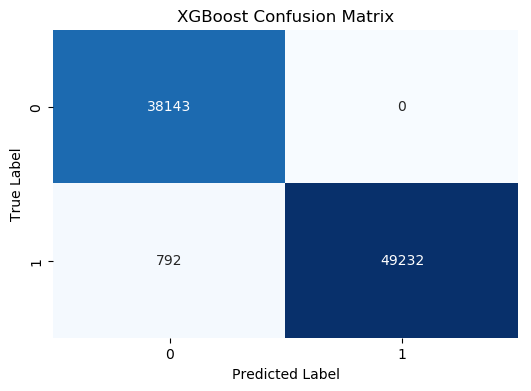

In [164]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'{best_model_name} Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

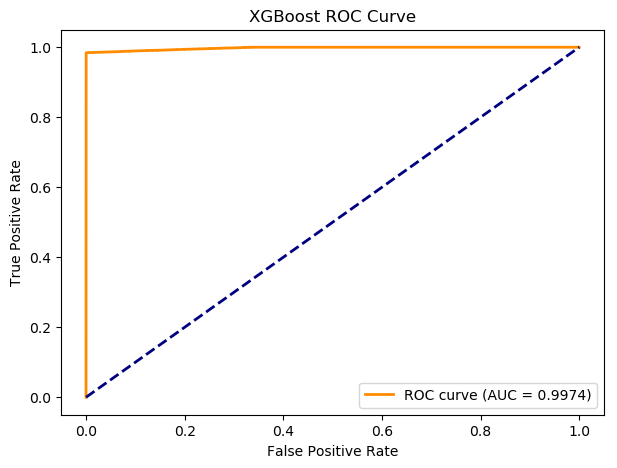

In [165]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'{best_model_name} ROC Curve')
plt.legend(loc="lower right")
plt.show()

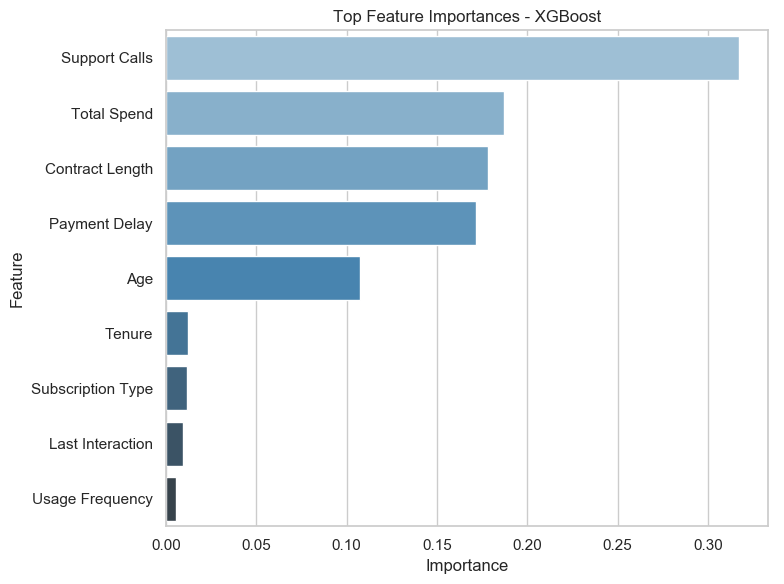

In [211]:
if hasattr(best_model, "feature_importances_"):
    feature_importances = best_model.feature_importances_
    features = X_train.columns
    fi_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    fi_df = fi_df.sort_values('Importance', ascending=False)

    plt.figure(figsize=(8,6))
    sns.barplot(x='Importance', y='Feature', data=fi_df.head(15), palette='Blues_d')
    plt.title(f'Top Feature Importances - {best_model_name}')
    plt.tight_layout()
    plt.show()
else:
    print(f"\n⚠️ {best_model_name} does not support feature_importances_ attribute.")